# No60

In [2]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.2 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 124.4 MB/s eta 0:00:01
     |████████████████████████████████| 128 kB 105.6 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 17.5 MB/s  eta 0:00:01
     |████████████████████████████████| 6.3 MB 91.5 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-2.0.0-py3-none-any.whl size=101341 sha256=348330458e3b7b63c4383b65d06a26b7f86d2a18c5182a7b0b16111bb5a88302
  Stored in directory: /root/.cache/pip/wheels/bb/1c/9c/412ec03f6d5ac7d41f4b965bde3fc0d1bd201da5ba3e2636de
Successfully built smart-open


In [4]:
from gensim.s import KeyedVectors

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

In [4]:
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

# No61

In [9]:
import numpy as np

def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

print(cos_sim(model['United_States'], model['U.S.']))

0.7310775


In [10]:
model.similarity('United_States', 'U.S.')

0.73107743

# No62

In [13]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

# No63

In [15]:
vec = model['Spain'] - model['Madrid'] + model['Athens']

model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.5606849193572998),
 ('Ioannis_Drymonakos', 0.555290937423706),
 ('Greeks', 0.5450686812400818),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759141921997),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

# No64

In [16]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2020-06-24 09:15:36--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.161.80, 2404:6800:4004:80b::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.161.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.02s   

2020-06-24 09:15:36 (32.0 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [17]:
# 先頭10行の確認
!head -10 questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [18]:
with open('./questions-words.txt', 'r') as f1, open('./questions-words-add.txt', 'w') as f2:
    for line in f1:
        line = line.split()
        if line[0] == ':':
            category = line[1]
        else:
            word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
            f2.write(' '.join([category] + line + [word, str(cos) + '\n']))

In [19]:
!head -10 questions-words-add.txt

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.6351871490478516
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878
capital-common-countries Athens Greece Beijing China China 0.7235777974128723
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622716903687
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414
capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527809739112854
capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824
capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
capital-common-countries Athens Greece Havana Cuba Cuba 0.6460991501808167
capital-common-countries Athens Greece Helsinki Finland Finland 0.6899983286857605


# No65

In [27]:
with open('./questions-words-add.txt', 'r') as f:
    sem_cnt = 0
    sem_cor = 0
    syn_cnt = 0
    syn_cor = 0
    
    for line in f:
        line = line.split()
        if not line[0].startswith('gram'):
            sem_cnt += 1
            if line[4] == line[5]:
                sem_cor += 1
        else:
            syn_cnt += 1
            if line[4] == line[5]:
                syn_cor += 1

print(f'意味的アナロジー正解率: {sem_cor/sem_cnt: .3f}')
print(f'文法的アナロジー正解率: {syn_cor/syn_cnt: .3f}')

意味的アナロジー正解率:  0.731
文法的アナロジー正解率:  0.740


# No66

In [1]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2020-06-24 14:04:27--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip.1’

wordsim353.zip.1    100%[===================>]  22.71K  --.-KB/s    in 0s      

2020-06-24 14:04:28 (148 MB/s) - ‘wordsim353.zip.1’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [2]:
!head -10 './combined.csv'

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [6]:
ws353 = []

with open('./combined.csv', 'r') as f:
    next(f)
    for line in f:
        line = [s.strip() for s in line.split(',')]
        line.append(model.similarity(line[0], line[1]))
        ws353.append(line)
        
for i in range(5):
    print(ws353[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 1.0]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [7]:
import numpy as np
from scipy.stats import spearmanr

human = np.array(ws353).T[2]
w2v = np.array(ws353).T[3]
correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数: {correlation: .3f}')

スピアマン相関係数:  0.685


# No67

In [8]:
countries = set()
with open('./questions-words-add.txt') as f:
    for line in f:
        line = line.split()
        if line[0] in ['capital-common-countries', 'capital-world']:
            countries.add(line[2])
        elif line[0] in ['currency', 'gram6-nationality-adjective']:
            countries.add(line[1])
countries = list(countries)

countries_vec = [model[country] for country in countries]

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)

for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Canada, Slovenia, Austria, Finland, Montenegro, Spain, Malta, Europe, Greece, Netherlands, Italy, Switzerland, France, Croatia, Germany, Slovakia, Norway, Morocco, Liechtenstein, Ireland, England, Portugal, Sweden, Greenland, Denmark, Iceland, Belgium, Cyprus, USA
cluster 1
Gabon, Namibia, Botswana, Nigeria, Mozambique, Mali, Niger, Tunisia, Burundi, Uganda, Senegal, Zimbabwe, Zambia, Algeria, Mauritania, Angola, Madagascar, Malawi, Guinea, Gambia, Kenya, Liberia, Sudan, Ghana, Somalia, Eritrea, Rwanda
cluster 2
Belize, Brazil, Peru, Argentina, Tuvalu, Nicaragua, Bahamas, Honduras, Jamaica, Mexico, Dominica, Suriname, Fiji, Samoa, Ecuador, Cuba, Colombia, Venezuela, Chile, Uruguay, Guyana
cluster 3
China, Taiwan, Bhutan, Libya, Indonesia, Nepal, Japan, Afghanistan, Lebanon, India, Egypt, Iraq, Korea, Pakistan, Syria, Iran, Jordan, Vietnam, Malaysia, Bahrain, Qatar, Laos, Oman, Cambodia, Thailand, Israel, Australia, Philippines, Bangladesh
cluster 4
Turkey, Albania, Turkmenist

# No68

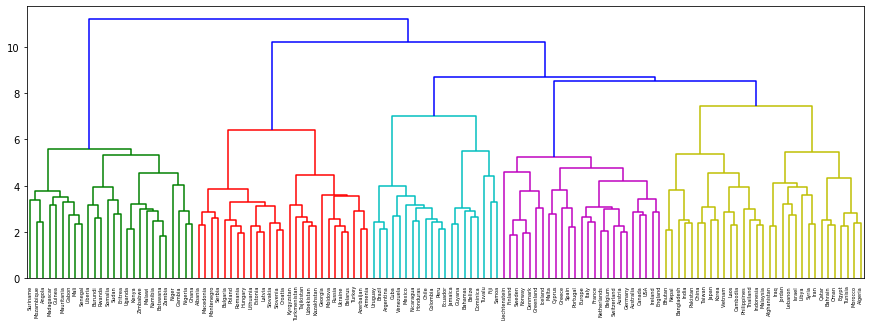

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()

# No69

(1797, 64)
(1797,)
(129, 2)


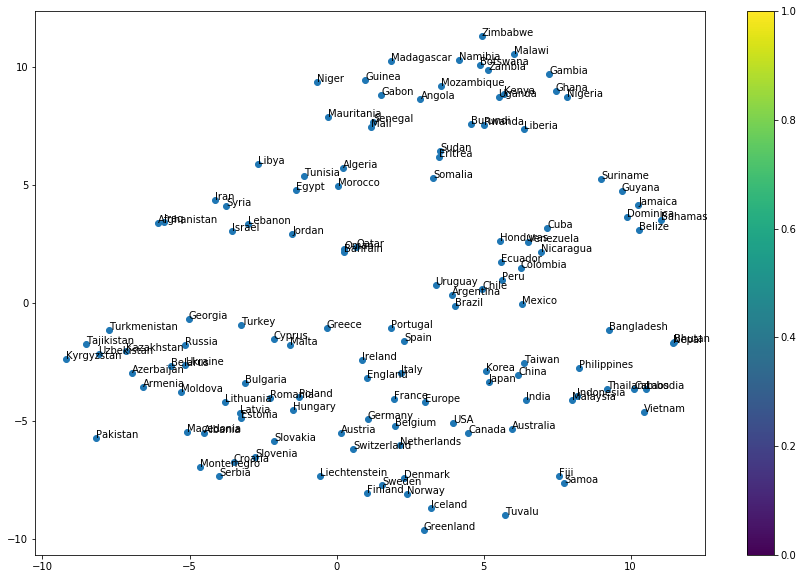

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(np.array(countries_vec).astype(np.float64))

plt.figure(figsize=(15, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
for (x,y), name in zip(X_reduced, countries):
    plt.annotate(name, (x, y))
plt.colorbar()